In [1]:
# processing
import math
import scipy.stats as stats
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [8]:
def find_circle(x, xc, yc, r):
    y_upper = yc + np.sqrt(r**2 - (x - xc)**2)
    y_lower = yc - np.sqrt(r**2 - (x - xc)**2)
    return y_upper, y_lower

In [9]:
def in_circle(row, xc_2, yc_2, R_2):
    x_coord = row['posX']
    if x_coord < (xc_2 - R_2) or x_coord > (xc_2 + R_2):
        return 0
    else:
        upper_bound, lower_bound = find_circle(x_coord, xc_2, yc_2, R_2)
        y_coord = row['posY']
        if y_coord > upper_bound or y_coord < lower_bound:
            return 0
        else:
            return 1

In [ ]:
def in_aster_fraction(row):
    series_index = row['series']
    run_index = row['run']
    if run_index < 10:
        fpath = '~/thomsonlab/simulation/percolation/run-series{}/run000{}/fiber_position.txt'.format(series_index, run_index)
    else:
        fpath = '~/thomsonlab/simulation/percolation/run-series{}/run00{}/fiber_position.txt'.format(series_index, run_index)

    df = pd.read_table(fpath,
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
    df = df.dropna(how='any')

    col = df_short.apply(in_circle, args=(xc_2, yc_2, R_2), axis=1)
    df_short = df_short.assign(in_circle=col.values)

    #expected_fraction = math.pi * R_2**2 / (math.pi * 16.92**2)

    return sum(df_short['in_circle']) / len(df_short)

## Analysing video with global contractile behaviour

In [2]:
df = pd.read_table('~/thomsonlab/simulation/percolation/run-series4/run0013/fiber_position.txt',
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
df = df.dropna(how='any')

In [3]:
x = df['posX']
y = df['posY']
data = np.vstack((x, y))

kde = stats.kde.gaussian_kde(data)
gx, gy = np.mgrid[x.min():x.max():128j, y.min():y.max():128j]
gxy = np.dstack((gx, gy)) # shape is (128, 128, 2)
z = np.apply_along_axis(kde, 2, gxy)
z = z.reshape(128, 128)

center_ix, center_iy = np.unravel_index(z.argmax(), z.shape)
center_x = center_ix / 128 * (x.max() - x.min()) + x.min()
center_y = center_iy / 128 * (y.max() - y.min()) + y.min()

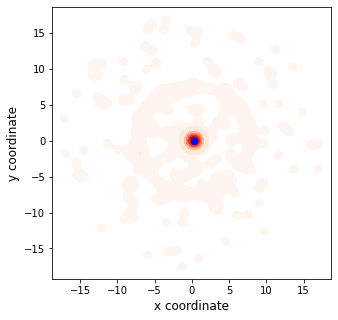

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(x=df['posX'], y=df['posY'], cmap="Reds", shade=True, bw_adjust=.5)
ax.scatter([center_x], [center_y], color='blue')
ax.set_xlabel('x coordinate', fontsize=12)
ax.set_ylabel('y coordinate', fontsize=12)
plt.show()

## Analysing video with local contractile behaviour

In [5]:
df = pd.read_table('~/thomsonlab/simulation/percolation/run-series4/run0005/fiber_position.txt',
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
df = df.dropna(how='any')

In [6]:
x = df['posX']
y = df['posY']
data = np.vstack((x, y))

kde = stats.kde.gaussian_kde(data)
gx, gy = np.mgrid[x.min():x.max():128j, y.min():y.max():128j]
gxy = np.dstack((gx, gy)) # shape is (128, 128, 2)
z = np.apply_along_axis(kde, 2, gxy)
z = z.reshape(128, 128)

center_ix, center_iy = np.unravel_index(z.argmax(), z.shape)
center_x = center_ix / 128 * (x.max() - x.min()) + x.min()
center_y = center_iy / 128 * (y.max() - y.min()) + y.min()

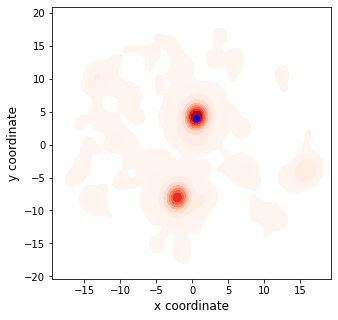

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(x=df['posX'], y=df['posY'], cmap="Reds", shade=True, bw_adjust=.5)
ax.scatter([center_x], [center_y], color='blue')
ax.set_xlabel('x coordinate', fontsize=12)
ax.set_ylabel('y coordinate', fontsize=12)
plt.show()

## Analysing all the runs in the series

In [10]:
aster_fraction = []
#area_fraction = []
for i in range(0, 14):
    if i < 10:
        fpath = '~/thomsonlab/simulation/percolation/run-series4/run000{}/fiber_position.txt'.format(i)
    else:
        fpath = '~/thomsonlab/simulation/percolation/run-series4/run00{}/fiber_position.txt'.format(i)
    
    df = pd.read_table(fpath,
                skiprows=5,
                delim_whitespace=True,
                names=['class', 'identity', 'length', 'posX', 'posY', 'dirX', 'dirY', 'endToEnd', 'cosinus', 'organizer'])
    df = df.dropna(how='any')

    x = df['posX']
    y = df['posY']
    data = np.vstack((x, y))

    kde = stats.kde.gaussian_kde(data)
    gx, gy = np.mgrid[x.min():x.max():128j, y.min():y.max():128j]
    gxy = np.dstack((gx, gy)) # shape is (128, 128, 2)
    z = np.apply_along_axis(kde, 2, gxy)
    z = z.reshape(128, 128)

    center_ix, center_iy = np.unravel_index(z.argmax(), z.shape)
    center_x = center_ix / 128 * (x.max() - x.min()) + x.min()
    center_y = center_iy / 128 * (y.max() - y.min()) + y.min()

    df_short = df[df.length == 1]
    col = df_short.apply(in_circle, args=(center_x, center_y, 1), axis=1)
    df_short = df_short.assign(in_circle=col.values)

    #area_fraction = math.pi * R_2**2 / (math.pi * 16.92**2)

    aster_fraction.append(sum(df_short['in_circle']) / len(df_short))

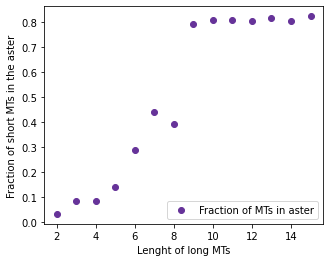

In [11]:
length = np.arange(2, 16, 1)

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(length, aster_fraction, color='rebeccapurple')
#ax.scatter(length, area_fraction, color='forestgreen')
ax.set_xlabel('Lenght of long MTs')
ax.set_ylabel('Fraction of short MTs in the aster')
ax.legend(['Fraction of MTs in aster', 'Ratio of aster area to total area'])
plt.savefig('../figures/percolation.png', dpi=300)
plt.show()